## Part-I Task-2

**Task-2** Clustering on Power Consumption Data (3 marks).

The time series dataset consists of samples about the weather factors and the power consumption of City A in 2017 (some specific information is hidden). Every ten minutes, the weather information including Temperature, Humidity, and Wind Speed is recorded together with the power consumption.

Notes:

- The data set has not be pre-processed, and you might need to consider pre-processing issues like missing value imputation and standardization before training the model.

- Clustering is daily based, i.e., you need to extract features for each day, and perform clustering on these features. There are many possible options. A simple one could be the concatenation of the samples belonging to the same day. But you could use other options.

- Note that clustering is unsupervised learning and no label information is specified or used in the training stage. So, all the attributes including Temperature, Humidity, Wind Speed, and Power Consumption could be used as the feature of a day.

- You need to tune the hyperparameter $K$ for KMeans clustering. Or, you could run the hierarchical agglomerative clustering on a small sample set to select the value for K with the help of dendrogram visualization.

- Try to interpretate the clusters. For example, different clusters might correspond to different months or seasons.

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn import preprocessing # data was not preprocessed so importing pre-processing with standardization is needed
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram # importing dendrogram
from scipy.spatial.distance import pdist
data_path="drive/My Drive/Colab Notebooks"
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv(f"{data_path}/MQClass/Assign-1/data/power-consumption/power-consumption.csv")
data

,DateTime,Temperature,Humidity,Wind Speed,Power Consumption
0,1/1/17 0:00,6.559,73.8,0.083,34055.69620
1,1/1/17 0:10,6.414,74.5,0.083,29814.68354
2,1/1/17 0:20,6.313,74.5,0.080,29128.10127
3,1/1/17 0:30,6.121,75.0,0.083,28228.86076
4,1/1/17 0:40,5.921,75.7,0.081,27335.69620
...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,31160.45627
52412,12/30/2017 23:20,6.947,72.6,0.082,30430.41825
52413,12/30/2017 23:30,6.900,72.8,0.086,29590.87452
52414,12/30/2017 23:40,6.758,73.0,0.080,28958.17490


In [4]:
# checking initial data with data.isnull().sum(), there are no null data
data.isnull().sum()

#since datetime is object, it is best to convert it to datetime
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Standardization
from sklearn.preprocessing import MinMaxScaler

# Pre-process all columns but DateTime since it's a date
attributes=["Temperature", "Humidity", "Wind Speed", "Power Consumption"]
scaler =MinMaxScaler()
data_num = data[attributes]
data_num_scaled=pd.DataFrame(scaler.fit_transform(data_num), columns=data_num.columns)
print(data_num_scaled)


       Temperature  Humidity  Wind Speed  Power Consumption
0         0.090091  0.748382    0.005130           0.526251
1         0.086146  0.756770    0.005130           0.415545
2         0.083399  0.756770    0.004663           0.397623
3         0.078176  0.762761    0.005130           0.374149
4         0.072736  0.771148    0.004819           0.350834
...            ...       ...         ...                ...
52411     0.102358  0.731608    0.004663           0.450675
52412     0.100645  0.734004    0.004974           0.431618
52413     0.099366  0.736401    0.005596           0.409703
52414     0.095504  0.738797    0.004663           0.393187
52415     0.090662  0.751977    0.004819           0.377306

[52416 rows x 4 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

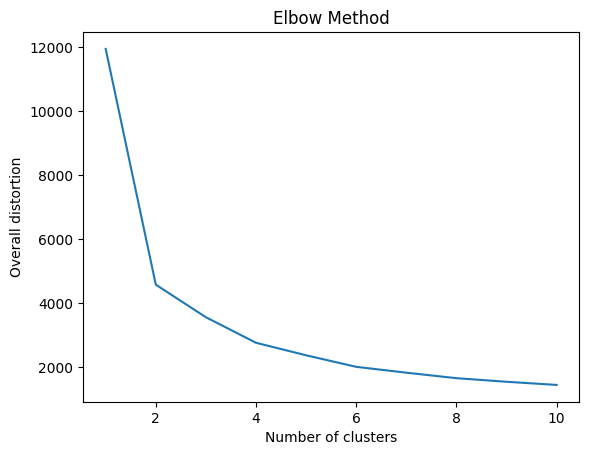

In [5]:
#Setting Up X value
X = data_num_scaled
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_data = X.values
X_scaled = scaler.fit_transform(X_data)
X = X_scaled

#DateTime value end up not using
#y = data['DateTime'].values

#Elbow method to find the best value of k
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Plotting the relationship between the distortion and k to find good value of k
plt.plot(range(1, 11), distortions)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Overall distortion')
plt.show()

#k=4 is good value

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



 Cluster center: 
 [[0.29486779 0.79939332 0.00633253 0.30597982]
 [0.60624981 0.51958828 0.75569826 0.64673594]
 [0.42247268 0.6188116  0.00726176 0.58606225]
 [0.43260204 0.77613981 0.75604701 0.39914736]]


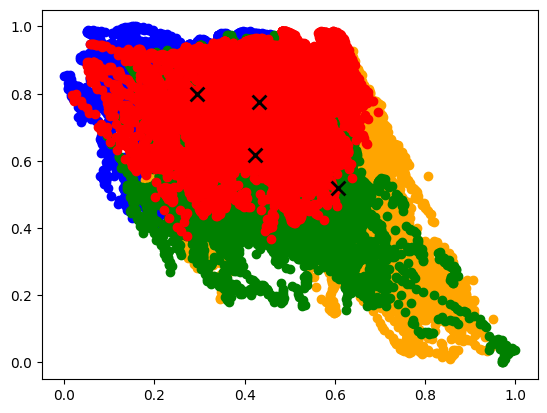

In [6]:
# Clusters when using best k value = 4
#print(X.shape)
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(X)
#plt.scatter(X[:,0], X[:,1]) scatter point without colors
#plt.show()
print('\n Cluster center: \n', kmeans.cluster_centers_)
y_pred = kmeans.predict(X)
colors = ['blue','orange','green','red']
for i, color in enumerate(colors):
    #print(i)
    #print(y_pred)
    #print(y_pred==i,0)
    #print("hi")
    #print(y_pred==i,1)

    plt.scatter(X[y_pred == i, 0], X[y_pred == i, 1], c=color)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', lw=2, c='black', s=100)

In [ ]:
from scipy.cluster.hierarchy import linkage
#Dendogram for cluster is 4
dist = pdist(X, 'euclidean')
linkage_matrix = linkage(dist, method = 'average')

plt.figure(figsize=(15,7))
dendrogram(linkage_matrix)
plt.show()
#I cannot run this as when I press run my entire laptop freezes, forcing me to do a hard reset

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



 Cluster center: 
 [[0.29017606 0.80558794 0.00646262 0.28798729]
 [0.43331341 0.77565668 0.75605509 0.40132617]
 [0.60730778 0.5174728  0.75581337 0.64710895]
 [0.46194546 0.50697216 0.00824149 0.50004855]
 [0.36852025 0.74950365 0.00608389 0.64356162]]


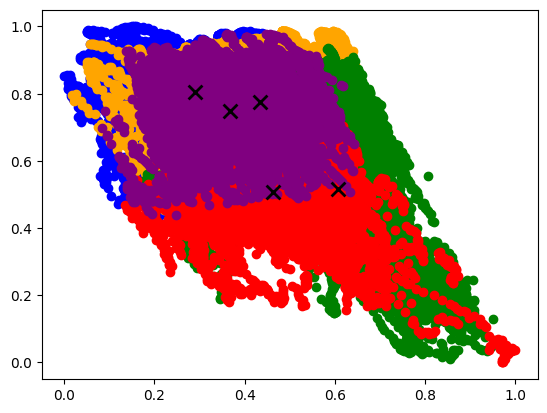

In [9]:
#Clusters when KMeans is 6
kmeans_2 = KMeans(n_clusters=5, init='k-means++')
kmeans_2.fit(X)
print('\n Cluster center: \n', kmeans_2.cluster_centers_)
y_pred_2 = kmeans_2.predict(X)
colors = ['blue','orange','green','red', 'purple', 'brown']
for i, color in enumerate(colors):
    plt.scatter(X[y_pred_2 == i, 0], X[y_pred_2 == i, 1], c=color)
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], marker='x', lw=2, c='black', s=100)

In [ ]:
#Dendogram for cluster is 6
#dist = pdist(X, 'euclidean')
#linkage_matrix = linkage(dist, method = 'complete')

#plt.figure(figsize=(15,7))
#dendrogram(linkage_matrix)
#plt.show()
#I cannot run this as when I press run my entire laptop freezes, forcing me to do a hard reset

In [ ]:
#In summary
# Best k value is 4
# one cluster is cluster values every (12/k value) month
# Too many values to run a dendrogram which results in crashing my laptop
# Looking from cluster center observations the earlier cluster tends to be from the right side of the chart while the later clusters tend to be around the center or towards left.